In [1]:
import os
import glob
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.applications import DenseNet121
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.layers.wrappers import TimeDistributed
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv1D, MaxPooling1D,MaxPooling2D
from keras.layers.recurrent import LSTM,GRU
from keras.layers import Bidirectional
from keras.layers.pooling import GlobalAveragePooling1D
from keras.layers import Dropout
import matplotlib.pyplot as plt
stlf_data=pd.read_csv('C:\\Users\\Khalid\\Desktop\\stlf_github\\stlf_sim\\Data/08_Aug.csv')

In [2]:
stlf_data

,Temp,Hum,A,B,C,D,E,F,G,H,I,J,Cons
0,29.500000,81.000000,1,3,1,3331.0,3320.0,3301.0,3118.0,3254.0,3595.0,3303.750000,3142.0
1,29.416667,81.583333,1,3,1,3347.0,3306.0,3268.0,3078.0,3322.0,3490.0,3294.500000,3157.0
2,29.333333,82.166667,1,3,1,3364.0,3315.0,3259.0,3204.0,3401.0,3443.0,3295.666667,3273.0
3,29.250000,82.750000,1,3,1,3355.0,3345.0,3293.0,3132.0,3350.0,3338.0,3292.000000,3249.0
4,29.166667,83.333333,2,3,1,3142.0,3331.0,3320.0,3116.0,3281.0,3153.0,3283.583333,3219.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8923,30.622452,79.727610,23,7,0,3792.0,3736.0,3703.0,3720.0,4040.0,3951.0,3758.333333,3835.0
8924,30.622452,79.727610,24,7,0,3799.0,3749.0,3687.0,3696.0,4015.0,3893.0,3769.416667,3820.0
8925,30.622452,79.727610,24,7,0,3802.0,3729.0,3698.0,3716.0,3961.0,3931.0,3781.833333,3847.0
8926,30.100000,79.727610,24,7,0,3809.0,3754.0,3710.0,3726.0,3990.0,3952.0,3797.083333,3893.0


In [3]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8928 entries, 0 to 8927
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8928 non-null   float64
 1   Hum     8928 non-null   float64
 2   A       8928 non-null   int64  
 3   B       8928 non-null   int64  
 4   C       8928 non-null   int64  
 5   D       8928 non-null   float64
 6   E       8928 non-null   float64
 7   F       8928 non-null   float64
 8   G       8928 non-null   float64
 9   H       8928 non-null   float64
 10  I       8928 non-null   float64
 11  J       8928 non-null   float64
 12  Cons    8928 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 906.9 KB


In [4]:
import numpy as np
stlf_data['A']=stlf_data['A'].astype(np.float64)
stlf_data['B']=stlf_data['B'].astype(np.float64)
stlf_data['C']=stlf_data['C'].astype(np.float64)

In [5]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8928 entries, 0 to 8927
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8928 non-null   float64
 1   Hum     8928 non-null   float64
 2   A       8928 non-null   float64
 3   B       8928 non-null   float64
 4   C       8928 non-null   float64
 5   D       8928 non-null   float64
 6   E       8928 non-null   float64
 7   F       8928 non-null   float64
 8   G       8928 non-null   float64
 9   H       8928 non-null   float64
 10  I       8928 non-null   float64
 11  J       8928 non-null   float64
 12  Cons    8928 non-null   float64
dtypes: float64(13)
memory usage: 906.9 KB


In [6]:
T = 11
HORIZON = 1


In [7]:
train = stlf_data.copy()[stlf_data.index <= 7392][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
train[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(train)
train.head()
#train.info()

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,-0.911426,-0.702480,0.851335,-1.660902,-0.544263,0.592295,-0.167627,-0.213571,-0.291421,-1.078153,-0.563259,0.854451,-0.292385
1,-0.852216,-0.732671,0.904255,-1.660902,-0.544263,0.592295,-0.104349,-0.269056,-0.422470,-1.240372,-0.282731,0.424478,-0.331120
2,-0.394328,-0.762863,0.957175,-1.660902,-0.544263,0.592295,-0.037115,-0.233387,-0.458211,-0.729382,0.043177,0.232014,-0.326234
3,-0.489064,-0.793055,1.010096,-1.660902,-0.544263,0.592295,-0.072709,-0.114491,-0.323190,-1.021376,-0.167220,-0.197959,-0.341588
4,-0.607483,-0.823246,1.063016,-1.516457,-0.544263,0.592295,-0.915110,-0.169976,-0.215968,-1.086264,-0.451873,-0.955531,-0.376833


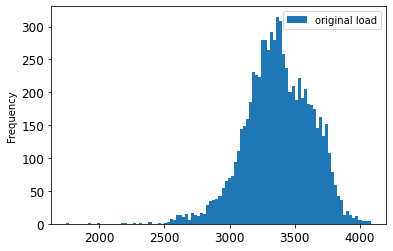

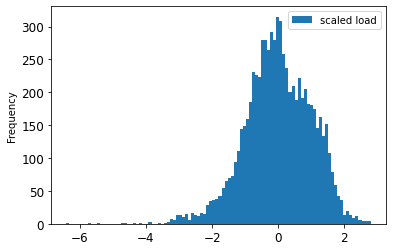

In [9]:
stlf_data[stlf_data.index <= 7392][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
train[train.index <= 7392][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

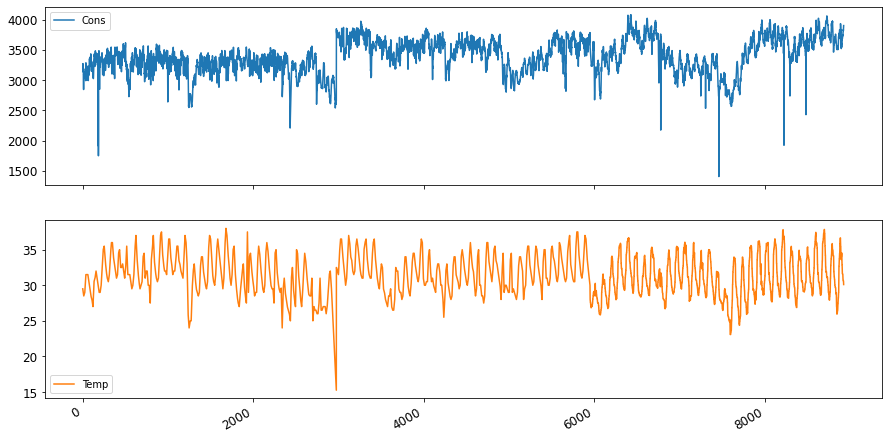

In [10]:
import matplotlib.pyplot as plt
stlf_data.plot(y=['Cons', 'Temp'], subplots=True, figsize=(15, 8), fontsize=12)
plt.show()

In [11]:
train_shifted = train.copy()
train_shifted=train_shifted.astype(np.float64)
train_shifted['y_t+100'] = train_shifted['Cons'].shift(-100)
train_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
0,-0.911426,-0.702480,0.851335,-1.660902,-0.544263,0.592295,-0.167627,-0.213571,-0.291421,-1.078153,-0.563259,0.854451,-0.292385,-0.445643
1,-0.852216,-0.732671,0.904255,-1.660902,-0.544263,0.592295,-0.104349,-0.269056,-0.422470,-1.240372,-0.282731,0.424478,-0.331120,-0.765375
2,-0.394328,-0.762863,0.957175,-1.660902,-0.544263,0.592295,-0.037115,-0.233387,-0.458211,-0.729382,0.043177,0.232014,-0.326234,-0.891689
3,-0.489064,-0.793055,1.010096,-1.660902,-0.544263,0.592295,-0.072709,-0.114491,-0.323190,-1.021376,-0.167220,-0.197959,-0.341588,-0.524590
4,-0.607483,-0.823246,1.063016,-1.516457,-0.544263,0.592295,-0.915110,-0.169976,-0.215968,-1.086264,-0.451873,-0.955531,-0.376833,-0.303540
5,-0.864058,-0.853438,1.115936,-1.516457,-0.544263,0.592295,-0.855786,-0.106565,-0.271565,-1.244427,-0.567385,-1.229895,-0.429874,-0.264067
6,-0.836427,-0.883630,1.168857,-1.516457,-0.544263,0.592295,-0.397014,-0.039190,-0.235824,-1.276871,-0.171345,-1.115235,-0.483614,-0.374592
7,-0.990372,-0.913821,1.221777,-1.516457,-0.544263,0.592295,-0.491932,-0.074859,-0.116688,-1.110597,-0.146593,-1.217610,-0.561431,-0.496958
8,-1.085107,-0.944013,1.274697,-1.372011,-0.544263,0.592295,-0.610580,-0.919019,-0.172285,-1.183595,-0.328111,-1.004671,-0.642738,-0.540379
9,-1.602205,-0.974204,1.327618,-1.372011,-0.544263,0.592295,-0.867650,-0.859572,-0.108746,-1.264705,-0.175470,-0.918676,-0.775341,-0.694324


In [12]:
for t in range(1, T+1):
    train_shifted['Cons_t-'+str(T-t)] = train_shifted['Cons'].shift(T-t)
train_shifted = train_shifted.rename(columns={'Cons':'Cons_original'})
train_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
0,-0.911426,-0.702480,0.851335,-1.660902,-0.544263,0.592295,-0.167627,-0.213571,-0.291421,-1.078153,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.911426
1,-0.852216,-0.732671,0.904255,-1.660902,-0.544263,0.592295,-0.104349,-0.269056,-0.422470,-1.240372,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.911426,-0.852216
2,-0.394328,-0.762863,0.957175,-1.660902,-0.544263,0.592295,-0.037115,-0.233387,-0.458211,-0.729382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.911426,-0.852216,-0.394328
3,-0.489064,-0.793055,1.010096,-1.660902,-0.544263,0.592295,-0.072709,-0.114491,-0.323190,-1.021376,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.911426,-0.852216,-0.394328,-0.489064
4,-0.607483,-0.823246,1.063016,-1.516457,-0.544263,0.592295,-0.915110,-0.169976,-0.215968,-1.086264,...,NaN,NaN,NaN,NaN,NaN,-0.911426,-0.852216,-0.394328,-0.489064,-0.607483
5,-0.864058,-0.853438,1.115936,-1.516457,-0.544263,0.592295,-0.855786,-0.106565,-0.271565,-1.244427,...,NaN,NaN,NaN,NaN,-0.911426,-0.852216,-0.394328,-0.489064,-0.607483,-0.864058
6,-0.836427,-0.883630,1.168857,-1.516457,-0.544263,0.592295,-0.397014,-0.039190,-0.235824,-1.276871,...,NaN,NaN,NaN,-0.911426,-0.852216,-0.394328,-0.489064,-0.607483,-0.864058,-0.836427
7,-0.990372,-0.913821,1.221777,-1.516457,-0.544263,0.592295,-0.491932,-0.074859,-0.116688,-1.110597,...,NaN,NaN,-0.911426,-0.852216,-0.394328,-0.489064,-0.607483,-0.864058,-0.836427,-0.990372
8,-1.085107,-0.944013,1.274697,-1.372011,-0.544263,0.592295,-0.610580,-0.919019,-0.172285,-1.183595,...,NaN,-0.911426,-0.852216,-0.394328,-0.489064,-0.607483,-0.864058,-0.836427,-0.990372,-1.085107
9,-1.602205,-0.974204,1.327618,-1.372011,-0.544263,0.592295,-0.867650,-0.859572,-0.108746,-1.264705,...,-0.911426,-0.852216,-0.394328,-0.489064,-0.607483,-0.864058,-0.836427,-0.990372,-1.085107,-1.602205


In [13]:
train_shifted = train_shifted.dropna(how='any')
train_shifted.head(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
10,-2.087724,-1.004396,1.380538,-1.372011,-0.544263,0.592295,-0.839966,-0.399841,-0.041235,-0.806436,...,-0.852216,-0.394328,-0.489064,-0.607483,-0.864058,-0.836427,-0.990372,-1.085107,-1.602205,-2.087724
11,-1.081160,-1.034588,1.433458,-1.372011,-0.544263,0.592295,-0.994208,-0.494958,-0.076976,-0.842935,...,-0.394328,-0.489064,-0.607483,-0.864058,-0.836427,-0.990372,-1.085107,-1.602205,-2.087724,-1.081160
12,-1.175896,-1.064779,1.486379,-1.227565,-0.544263,0.592295,-1.089127,-0.613853,-0.922841,-0.988932,...,-0.489064,-0.607483,-0.864058,-0.836427,-0.990372,-1.085107,-1.602205,-2.087724,-1.081160,-1.175896
13,-1.207474,-1.049684,1.463698,-1.227565,-0.544263,0.592295,-1.607223,-0.871461,-0.863273,-1.090319,...,-0.607483,-0.864058,-0.836427,-0.990372,-1.085107,-1.602205,-2.087724,-1.081160,-1.175896,-1.207474
14,-1.250894,-1.034588,1.441018,-1.227565,-0.544263,0.592295,-2.093679,-0.843719,-0.402614,-1.037598,...,-0.864058,-0.836427,-0.990372,-1.085107,-1.602205,-2.087724,-1.081160,-1.175896,-1.207474,-1.250894


In [14]:
train_shifted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7283 entries, 10 to 7292
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Cons_original  7283 non-null   float64
 1   Temp           7283 non-null   float64
 2   Hum            7283 non-null   float64
 3   A              7283 non-null   float64
 4   B              7283 non-null   float64
 5   C              7283 non-null   float64
 6   D              7283 non-null   float64
 7   E              7283 non-null   float64
 8   F              7283 non-null   float64
 9   G              7283 non-null   float64
 10  H              7283 non-null   float64
 11  I              7283 non-null   float64
 12  J              7283 non-null   float64
 13  y_t+100        7283 non-null   float64
 14  Cons_t-10      7283 non-null   float64
 15  Cons_t-9       7283 non-null   float64
 16  Cons_t-8       7283 non-null   float64
 17  Cons_t-7       7283 non-null   float64
 18  Cons_t-

In [15]:
y_train = train_shifted[['y_t+100']]
y_train


,y_t+100
10,-0.690377
11,-0.706166
12,-0.690377
13,-0.658798
14,-0.587746
...,...
7288,0.114875
7289,0.118822
7290,0.205663
7291,0.233294


In [16]:
X_train = train_shifted[['Cons_original','Cons_t-0','Cons_t-1','Cons_t-2','Cons_t-3','Cons_t-4','Cons_t-5','Cons_t-6','Cons_t-7','Cons_t-8', 'Cons_t-9','Cons_t-10','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_train


,Cons_original,Cons_t-0,Cons_t-1,Cons_t-2,Cons_t-3,Cons_t-4,Cons_t-5,Cons_t-6,Cons_t-7,Cons_t-8,...,A,B,C,D,E,F,G,H,I,J
10,-2.087724,-2.087724,-1.602205,-1.085107,-0.990372,-0.836427,-0.864058,-0.607483,-0.489064,-0.394328,...,-1.372011,-0.544263,0.592295,-0.839966,-0.399841,-0.041235,-0.806436,-0.035206,-0.496893,-0.956798
11,-1.081160,-1.081160,-2.087724,-1.602205,-1.085107,-0.990372,-0.836427,-0.864058,-0.607483,-0.489064,...,-1.372011,-0.544263,0.592295,-0.994208,-0.494958,-0.076976,-0.842935,-0.196098,-0.558318,-1.046131
12,-1.175896,-1.175896,-1.081160,-2.087724,-1.602205,-1.085107,-0.990372,-0.836427,-0.864058,-0.607483,...,-1.227565,-0.544263,0.592295,-1.089127,-0.613853,-0.922841,-0.988932,-0.253853,-0.623838,-1.069511
13,-1.207474,-1.207474,-1.175896,-1.081160,-2.087724,-1.602205,-1.085107,-0.990372,-0.836427,-0.864058,...,-1.227565,-0.544263,0.592295,-1.607223,-0.871461,-0.863273,-1.090319,-0.031081,-0.484608,-1.100917
14,-1.250894,-1.250894,-1.207474,-1.175896,-1.081160,-2.087724,-1.602205,-1.085107,-0.990372,-0.836427,...,-1.227565,-0.544263,0.592295,-2.093679,-0.843719,-0.402614,-1.037598,-0.002203,-0.509178,-1.176641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7288,-0.050912,-0.050912,-0.165384,-0.070649,-0.023281,-0.240383,-0.133806,-0.193016,-0.248278,-0.228541,...,1.516906,-0.027007,0.592295,-0.242771,-0.233387,-0.823561,-0.023728,0.105058,0.137829,-0.256443
7289,-0.023281,-0.023281,-0.050912,-0.165384,-0.070649,-0.023281,-0.240383,-0.133806,-0.193016,-0.248278,...,1.516906,-0.027007,0.592295,-0.025250,-0.253203,-0.569404,0.106047,0.043177,0.137829,-0.208985
7290,-0.023281,-0.023281,-0.023281,-0.050912,-0.165384,-0.070649,-0.023281,-0.240383,-0.133806,-0.193016,...,1.516906,-0.027007,0.592295,-0.072709,-0.197718,-0.577347,0.057381,0.080305,0.236109,-0.160829
7291,0.035928,0.035928,-0.023281,-0.023281,-0.050912,-0.165384,-0.070649,-0.023281,-0.240383,-0.133806,...,1.516906,-0.027007,0.592295,-0.167627,-0.138270,-0.394672,0.077659,0.138061,0.186969,-0.123491


In [17]:
X_train=np.atleast_3d(X_train)
X_train.shape

(7283, 24, 1)

In [18]:

#subsequences=2
#timesteps=X_train.shape[1]//subsequences
X_train=X_train.reshape(7283,2,1,12)
#print(X_train.shape)

In [19]:
valid = stlf_data.copy()[(stlf_data.index >=7393) & (stlf_data.index <=8353)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
valid


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7393,3427.0,29.762451,88.39839,1.0,6.0,1.0,3403.0,3387.0,3342.0,3362.0,3418.0,3347.0,3417.666667
7394,3435.0,29.482451,90.03682,1.0,6.0,1.0,3425.0,3391.0,3415.0,3359.0,3390.0,3341.0,3419.333333
7395,3426.0,29.202452,91.67525,1.0,6.0,1.0,3432.0,3424.0,3431.0,3340.0,3369.0,3285.0,3418.916667
7396,3409.0,29.202452,91.67525,2.0,6.0,1.0,3440.0,3402.0,3435.0,3324.0,3381.0,3328.0,3416.750000
7397,3388.0,29.202452,91.67525,2.0,6.0,1.0,3427.0,3403.0,3387.0,3347.0,3327.0,3321.0,3416.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8349,3637.0,29.862452,79.07139,24.0,1.0,0.0,3564.0,3506.0,3431.0,3853.0,3835.0,3955.0,3558.916667
8350,3719.0,29.612452,79.07139,24.0,1.0,0.0,3582.0,3589.0,3508.0,3895.0,3890.0,3982.0,3576.500000
8351,3687.0,29.612452,79.50921,24.0,1.0,0.0,3605.0,3551.0,3489.0,3893.0,3897.0,4000.0,3593.000000
8352,3721.0,29.612452,79.50921,1.0,2.0,1.0,3611.0,3569.0,3496.0,3865.0,3884.0,3984.0,3611.750000


In [20]:
valid[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(valid)
valid.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7393,0.115754,-0.239374,1.059595,-1.658081,0.810998,0.815789,0.054853,0.014369,-0.104364,0.027172,0.322984,0.285065,0.097882
7394,0.137126,-0.323842,1.179973,-1.658081,0.810998,0.815789,0.113715,0.025079,0.091198,0.019207,0.244531,0.266853,0.102493
7395,0.113083,-0.408310,1.300350,-1.658081,0.810998,0.815789,0.132444,0.113440,0.134060,-0.031239,0.185692,0.096877,0.101340
7396,0.067668,-0.408310,1.300350,-1.513750,0.810998,0.815789,0.153849,0.054533,0.144776,-0.073720,0.219314,0.227394,0.095347
7397,0.011567,-0.408310,1.300350,-1.513750,0.810998,0.815789,0.119066,0.057210,0.016188,-0.012654,0.068012,0.206147,0.095577
7398,0.006224,-0.488254,1.343075,-1.513750,0.810998,0.815789,0.140471,0.116117,0.026904,-0.060445,0.146465,0.154547,0.094425
7399,-0.132692,-0.568197,1.385800,-1.513750,0.810998,0.815789,0.116391,0.134861,0.115308,-0.100271,0.171682,0.020994,0.073680
7400,-0.242222,-0.568197,1.385800,-1.369419,0.810998,0.815789,0.070906,0.156281,0.056372,-0.071065,0.076418,0.109018,0.048555
7401,-0.202150,-0.568197,1.385800,-1.369419,0.810998,0.815789,0.014720,0.121473,0.059051,-0.156027,0.003569,0.045277,0.026658
7402,-0.359766,-0.664732,1.388913,-1.369419,0.810998,0.815789,0.009369,0.142893,0.117987,-0.116201,0.037191,0.011889,-0.013911


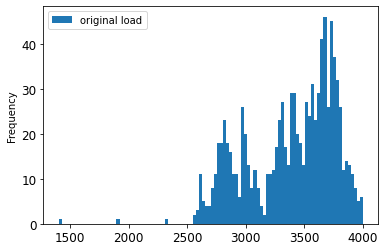

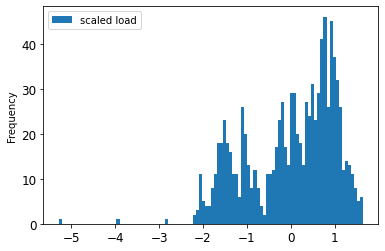

In [21]:
stlf_data[(stlf_data.index >=7393) & (stlf_data.index <=8353)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
valid[(valid.index >=7393) & (valid.index <=8353)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [22]:
valid_shifted = valid.copy()
valid_shifted=valid_shifted.astype(np.float64)
valid_shifted['y_t+100'] = valid_shifted['Cons'].shift(-100)
valid_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
7393,0.115754,-0.239374,1.059595,-1.658081,0.810998,0.815789,0.054853,0.014369,-0.104364,0.027172,0.322984,0.285065,0.097882,-0.910088
7394,0.137126,-0.323842,1.179973,-1.658081,0.810998,0.815789,0.113715,0.025079,0.091198,0.019207,0.244531,0.266853,0.102493,-0.960846
7395,0.113083,-0.408310,1.300350,-1.658081,0.810998,0.815789,0.132444,0.113440,0.134060,-0.031239,0.185692,0.096877,0.101340,-1.024961
7396,0.067668,-0.408310,1.300350,-1.513750,0.810998,0.815789,0.153849,0.054533,0.144776,-0.073720,0.219314,0.227394,0.095347,-1.105105
7397,0.011567,-0.408310,1.300350,-1.513750,0.810998,0.815789,0.119066,0.057210,0.016188,-0.012654,0.068012,0.206147,0.095577,-1.083733
7398,0.006224,-0.488254,1.343075,-1.513750,0.810998,0.815789,0.140471,0.116117,0.026904,-0.060445,0.146465,0.154547,0.094425,-0.966189
7399,-0.132692,-0.568197,1.385800,-1.513750,0.810998,0.815789,0.116391,0.134861,0.115308,-0.100271,0.171682,0.020994,0.073680,-0.966189
7400,-0.242222,-0.568197,1.385800,-1.369419,0.810998,0.815789,0.070906,0.156281,0.056372,-0.071065,0.076418,0.109018,0.048555,-1.008932
7401,-0.202150,-0.568197,1.385800,-1.369419,0.810998,0.815789,0.014720,0.121473,0.059051,-0.156027,0.003569,0.045277,0.026658,-1.067705
7402,-0.359766,-0.664732,1.388913,-1.369419,0.810998,0.815789,0.009369,0.142893,0.117987,-0.116201,0.037191,0.011889,-0.013911,-1.113119


In [23]:
for t in range(1, T+1):
    valid_shifted['Cons_t-'+str(T-t)] = valid_shifted['Cons'].shift(T-t)
valid_shifted = valid_shifted.rename(columns={'Cons':'Cons_original'})
valid_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
7393,0.115754,-0.239374,1.059595,-1.658081,0.810998,0.815789,0.054853,0.014369,-0.104364,0.027172,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.115754
7394,0.137126,-0.323842,1.179973,-1.658081,0.810998,0.815789,0.113715,0.025079,0.091198,0.019207,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.115754,0.137126
7395,0.113083,-0.408310,1.300350,-1.658081,0.810998,0.815789,0.132444,0.113440,0.134060,-0.031239,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.115754,0.137126,0.113083
7396,0.067668,-0.408310,1.300350,-1.513750,0.810998,0.815789,0.153849,0.054533,0.144776,-0.073720,...,NaN,NaN,NaN,NaN,NaN,NaN,0.115754,0.137126,0.113083,0.067668
7397,0.011567,-0.408310,1.300350,-1.513750,0.810998,0.815789,0.119066,0.057210,0.016188,-0.012654,...,NaN,NaN,NaN,NaN,NaN,0.115754,0.137126,0.113083,0.067668,0.011567
7398,0.006224,-0.488254,1.343075,-1.513750,0.810998,0.815789,0.140471,0.116117,0.026904,-0.060445,...,NaN,NaN,NaN,NaN,0.115754,0.137126,0.113083,0.067668,0.011567,0.006224
7399,-0.132692,-0.568197,1.385800,-1.513750,0.810998,0.815789,0.116391,0.134861,0.115308,-0.100271,...,NaN,NaN,NaN,0.115754,0.137126,0.113083,0.067668,0.011567,0.006224,-0.132692
7400,-0.242222,-0.568197,1.385800,-1.369419,0.810998,0.815789,0.070906,0.156281,0.056372,-0.071065,...,NaN,NaN,0.115754,0.137126,0.113083,0.067668,0.011567,0.006224,-0.132692,-0.242222
7401,-0.202150,-0.568197,1.385800,-1.369419,0.810998,0.815789,0.014720,0.121473,0.059051,-0.156027,...,NaN,0.115754,0.137126,0.113083,0.067668,0.011567,0.006224,-0.132692,-0.242222,-0.202150
7402,-0.359766,-0.664732,1.388913,-1.369419,0.810998,0.815789,0.009369,0.142893,0.117987,-0.116201,...,0.115754,0.137126,0.113083,0.067668,0.011567,0.006224,-0.132692,-0.242222,-0.202150,-0.359766


In [24]:
valid_shifted = valid_shifted.dropna(how='any')
valid_shifted.head(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
7403,-0.319695,-0.761267,1.392026,-1.369419,0.810998,0.815789,-0.129760,0.118795,0.136739,-2.173872,...,0.137126,0.113083,0.067668,0.011567,0.006224,-0.132692,-0.242222,-0.202150,-0.359766,-0.319695
7404,-0.231536,-0.761267,1.392026,-1.225087,0.810998,0.815789,-0.239458,0.073276,0.158171,-0.171957,...,0.113083,0.067668,0.011567,0.006224,-0.132692,-0.242222,-0.202150,-0.359766,-0.319695,-0.231536
7405,-0.284965,-0.761267,1.392026,-1.225087,0.810998,0.815789,-0.199325,0.017046,0.123345,-0.272849,...,0.067668,0.011567,0.006224,-0.132692,-0.242222,-0.202150,-0.359766,-0.319695,-0.231536,-0.284965
7406,-0.341066,-0.835176,1.446038,-1.225087,0.810998,0.815789,-0.357182,0.011691,0.144776,-0.317985,...,0.011567,0.006224,-0.132692,-0.242222,-0.202150,-0.359766,-0.319695,-0.231536,-0.284965,-0.341066
7407,-0.386481,-0.909086,1.500050,-1.225087,0.810998,0.815789,-0.317049,-0.127544,0.120666,-0.336571,...,0.006224,-0.132692,-0.242222,-0.202150,-0.359766,-0.319695,-0.231536,-0.284965,-0.341066,-0.386481


In [25]:
y_valid = valid_shifted[['y_t+100']]
y_valid


,y_t+100
7403,-1.062362
7404,-1.121134
7405,-1.051676
7406,-1.024961
7407,-0.979546
...,...
8249,0.676762
8250,0.895822
8251,0.810335
8252,0.901165


In [26]:
X_valid = valid_shifted[['Cons_original','Cons_t-0','Cons_t-1','Cons_t-2','Cons_t-3','Cons_t-4','Cons_t-5','Cons_t-6','Cons_t-7','Cons_t-8', 'Cons_t-9','Cons_t-10','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_valid


,Cons_original,Cons_t-0,Cons_t-1,Cons_t-2,Cons_t-3,Cons_t-4,Cons_t-5,Cons_t-6,Cons_t-7,Cons_t-8,...,A,B,C,D,E,F,G,H,I,J
7403,-0.319695,-0.319695,-0.359766,-0.202150,-0.242222,-0.132692,0.006224,0.011567,0.067668,0.113083,...,-1.369419,0.810998,0.815789,-0.129760,0.118795,0.136739,-2.173872,0.003569,-0.112559,-0.052635
7404,-0.231536,-0.231536,-0.319695,-0.359766,-0.202150,-0.242222,-0.132692,0.006224,0.011567,0.067668,...,-1.225087,0.810998,0.815789,-0.239458,0.073276,0.158171,-0.171957,0.003569,-0.155053,-0.085597
7405,-0.284965,-0.284965,-0.231536,-0.319695,-0.359766,-0.202150,-0.242222,-0.132692,0.006224,0.011567,...,-1.225087,0.810998,0.815789,-0.199325,0.017046,0.123345,-0.272849,-0.072082,-0.209688,-0.120172
7406,-0.341066,-0.341066,-0.284965,-0.231536,-0.319695,-0.359766,-0.202150,-0.242222,-0.132692,0.006224,...,-1.225087,0.810998,0.815789,-0.357182,0.011691,0.144776,-0.317985,-0.150535,-0.346276,-0.161432
7407,-0.386481,-0.386481,-0.341066,-0.284965,-0.231536,-0.319695,-0.359766,-0.202150,-0.242222,-0.132692,...,-1.225087,0.810998,0.815789,-0.317049,-0.127544,0.120666,-0.336571,-0.212177,-0.237006,-0.204535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8249,1.021381,1.021381,1.050767,1.061453,1.117553,0.946580,0.863764,0.922536,0.909179,0.810335,...,1.517204,1.259944,-1.225808,0.951164,0.817648,0.852012,1.171503,1.782770,1.851277,0.977015
8250,1.114882,1.114882,1.021381,1.050767,1.061453,1.117553,0.946580,0.863764,0.922536,0.909179,...,1.517204,1.259944,-1.225808,1.122399,0.916719,0.948453,1.086541,1.788374,1.969654,0.992228
8251,1.077481,1.077481,1.114882,1.021381,1.050767,1.061453,1.117553,0.946580,0.863764,0.922536,...,1.517204,1.259944,-1.225808,1.066213,0.930107,0.849333,1.176813,1.830402,2.051607,1.012742
8252,1.077481,1.077481,1.077481,1.114882,1.021381,1.050767,1.061453,1.117553,0.946580,0.863764,...,1.661535,1.259944,-1.225808,1.055511,0.871200,0.806470,1.229914,1.715524,1.987866,1.036945


In [27]:
X_valid=np.atleast_3d(X_valid)
X_valid.shape

(851, 24, 1)

In [28]:
#subsequences=2
#X_valid=X_valid.shape[1]//subsequences
X_valid=X_valid.reshape(851,2,1,12)
print(X_valid.shape)

(851, 2, 1, 12)


In [29]:
#from keras.layers import RepeatVector
from keras.layers import BatchNormalization
from keras.layers import Input

model = models.Sequential()
model.add(TimeDistributed(Conv1D(filters=128, kernel_size=1, activation='relu'),input_shape=(None,1,12)))
#model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
#model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
#model.add(Dropout(0.1))
model.add(TimeDistributed(Conv1D(filters=128, kernel_size=1, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
#model.add(Dropout(0.1))
#model.add(TimeDistributed(MaxPooling1D(pool_size=2,strides=1, padding='valid')))
#model.add(Dropout(0.1))
model.add(TimeDistributed(Flatten()))
#model.add(RepeatVector(5629))
model.add((LSTM(64,activation='linear')))
#model.add(Flatten())
#model.add(GRU(300))
#model.add(Dense(150,activation='linear'))
#model.add(Dense(75,activation='linear'))
#model.add(Dropout(0.1))
#model.add(Bidirectional(LSTM(300)))
model.add(Dense(1,activation='linear'))

In [30]:
from keras import optimizers
sgd = optimizers.Adam(lr=0.000005)
model.compile(sgd, loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, None, 1, 128)      1664      
_________________________________________________________________
time_distributed_1 (TimeDist (None, None, 1, 128)      16512     
_________________________________________________________________
time_distributed_2 (TimeDist (None, None, 1, 128)      0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, None, 128)         0         
_________________________________________________________________
lstm (LSTM)                  (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 67,649
Trainable params: 67,649
Non-trainable params: 0
____________________________________________________

In [31]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [32]:
import time
start=time.time()

history = model.fit(X_train,
          y_train,
          batch_size=256,
          epochs=500,verbose=1,
          validation_data=(X_valid, y_valid),
          callbacks=[earlystop],
          )

stop=time.time()
print(f"Training time: {stop - start}s")

Epoch 1/500
29/29 [==============================] - 1s 33ms/step - loss: 0.9830 - val_loss: 0.9971
Epoch 2/500
29/29 [==============================] - 0s 11ms/step - loss: 0.9707 - val_loss: 0.9781
Epoch 3/500
29/29 [==============================] - 0s 12ms/step - loss: 0.9590 - val_loss: 0.9597
Epoch 4/500
29/29 [==============================] - 0s 11ms/step - loss: 0.9477 - val_loss: 0.9423
Epoch 5/500
29/29 [==============================] - 0s 12ms/step - loss: 0.9370 - val_loss: 0.9252
Epoch 6/500
29/29 [==============================] - 0s 11ms/step - loss: 0.9266 - val_loss: 0.9090
Epoch 7/500
29/29 [==============================] - 0s 11ms/step - loss: 0.9166 - val_loss: 0.8933
Epoch 8/500
29/29 [==============================] - 0s 11ms/step - loss: 0.9070 - val_loss: 0.8781
Epoch 9/500
29/29 [==============================] - 0s 11ms/step - loss: 0.8976 - val_loss: 0.8632
Epoch 10/500
29/29 [==============================] - 0s 11ms/step - loss: 0.8885 - val_loss: 0.8489

29/29 [==============================] - 0s 11ms/step - loss: 0.6424 - val_loss: 0.5155
Epoch 163/500
29/29 [==============================] - 0s 10ms/step - loss: 0.6415 - val_loss: 0.5149
Epoch 164/500
29/29 [==============================] - 0s 10ms/step - loss: 0.6407 - val_loss: 0.5141
Epoch 165/500
29/29 [==============================] - 0s 11ms/step - loss: 0.6399 - val_loss: 0.5136
Epoch 166/500
29/29 [==============================] - 0s 10ms/step - loss: 0.6391 - val_loss: 0.5133
Epoch 167/500
29/29 [==============================] - 0s 10ms/step - loss: 0.6383 - val_loss: 0.5117
Epoch 168/500
29/29 [==============================] - 0s 10ms/step - loss: 0.6373 - val_loss: 0.5115
Epoch 169/500
29/29 [==============================] - 0s 11ms/step - loss: 0.6365 - val_loss: 0.5119
Epoch 170/500
29/29 [==============================] - 0s 11ms/step - loss: 0.6356 - val_loss: 0.5106
Epoch 171/500
29/29 [==============================] - 0s 10ms/step - loss: 0.6348 - val_loss: 0

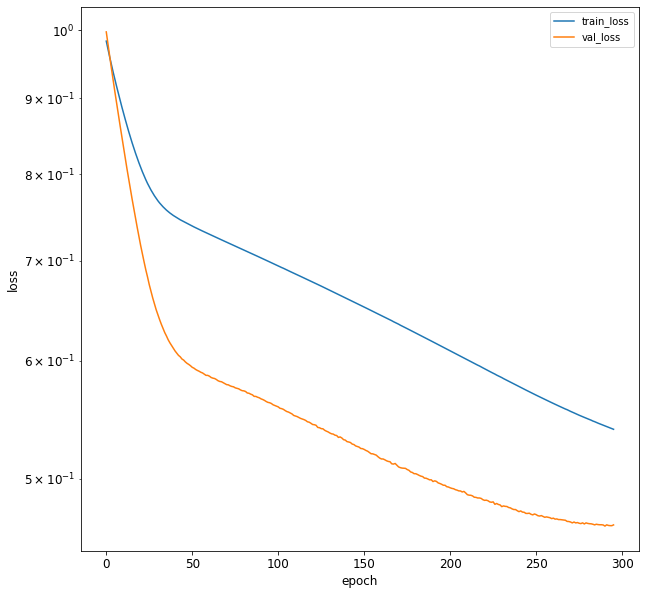

In [33]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()



In [34]:
test = stlf_data.copy()[(stlf_data.index >= 8354) & (stlf_data.index <=8565)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
test.head(20)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
8354,3627.0,29.077452,82.552515,1.0,2.0,1.0,3719.0,3582.0,3589.0,3879.0,3878.0,3963.0,3631.000000
8355,3585.0,28.542452,85.595820,1.0,2.0,1.0,3687.0,3605.0,3551.0,3878.0,3866.0,3961.0,3633.833333
8356,3596.0,28.542452,85.595820,2.0,2.0,1.0,3721.0,3611.0,3569.0,3849.0,3800.0,3924.0,3636.083333
8357,3538.0,28.542452,85.595820,2.0,2.0,1.0,3699.0,3637.0,3564.0,3846.0,3781.0,3843.0,3633.916667
8358,3541.0,28.412452,85.940575,2.0,2.0,1.0,3627.0,3719.0,3582.0,3817.0,3758.0,3816.0,3630.500000
8359,3509.0,28.282452,86.285330,2.0,2.0,1.0,3585.0,3687.0,3605.0,3808.0,3761.0,3813.0,3622.500000
8360,3459.0,28.282452,86.285330,3.0,2.0,1.0,3596.0,3721.0,3611.0,3781.0,3766.0,3805.0,3609.833333
8361,3469.0,28.282452,86.285330,3.0,2.0,1.0,3538.0,3699.0,3637.0,3774.0,3724.0,3714.0,3595.833333
8362,3483.0,27.852452,86.661775,3.0,2.0,1.0,3541.0,3627.0,3719.0,3746.0,3721.0,3747.0,3576.166667
8363,3436.0,27.422451,87.038220,3.0,2.0,1.0,3509.0,3585.0,3687.0,3734.0,3689.0,3734.0,3555.250000


In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
test[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(test)
test.head(10)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 8354 to 8565
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cons    212 non-null    float64
 1   Temp    212 non-null    float64
 2   Hum     212 non-null    float64
 3   A       212 non-null    float64
 4   B       212 non-null    float64
 5   C       212 non-null    float64
 6   D       212 non-null    float64
 7   E       212 non-null    float64
 8   F       212 non-null    float64
 9   G       212 non-null    float64
 10  H       212 non-null    float64
 11  I       212 non-null    float64
 12  J       212 non-null    float64
dtypes: float64(13)
memory usage: 23.2 KB


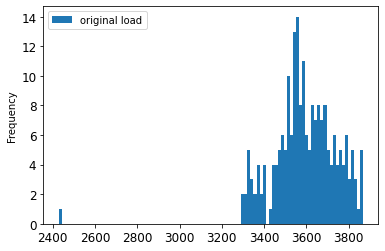

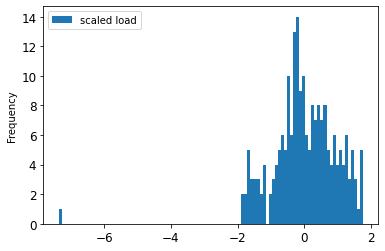

In [36]:
stlf_data[(stlf_data.index >= 8354) & (stlf_data.index <=8565)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
test[(test.index >=8354) & (test.index <= 8565)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [37]:
test_shifted = test.copy()
test_shifted=test_shifted.astype(np.float64)
test_shifted['y_t+100'] = test_shifted['Cons'].shift(-100)
test_shifted.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
8354,0.230802,-0.816050,0.702767,-1.498364,-1.004934,0.0,0.790719,-0.081883,-0.033282,2.029484,1.363377,1.497244,0.298366,0.807419
8355,-0.035329,-1.043549,0.971002,-1.498364,-1.004934,0.0,0.588745,0.063409,-0.273319,2.023599,1.309269,1.485657,0.320976,0.718709
8356,0.034372,-1.043549,0.971002,-1.357685,-1.004934,0.0,0.803343,0.101311,-0.159617,1.852959,1.011680,1.271292,0.338931,0.585643
8357,-0.333142,-1.043549,0.971002,-1.357685,-1.004934,0.0,0.664485,0.265555,-0.191201,1.835306,0.926011,0.802008,0.321641,0.439905
8358,-0.314132,-1.098828,1.001389,-1.357685,-1.004934,0.0,0.210043,0.783554,-0.077499,1.664665,0.822305,0.645580,0.294376,0.553961
8359,-0.516899,-1.154108,1.031775,-1.357685,-1.004934,0.0,-0.055049,0.581408,0.067786,1.611708,0.835832,0.628199,0.230536,0.408223
8360,-0.833721,-1.154108,1.031775,-1.217006,-1.004934,0.0,0.014380,0.796188,0.105686,1.452835,0.858377,0.581850,0.129456,0.142092
8361,-0.770357,-1.154108,1.031775,-1.217006,-1.004934,0.0,-0.351699,0.657213,0.269922,1.411646,0.669002,0.054630,0.017735,0.097737
8362,-0.681646,-1.336958,1.064955,-1.217006,-1.004934,0.0,-0.332764,0.202384,0.787896,1.246889,0.655475,0.245819,-0.139205,0.211793
8363,-0.979459,-1.519807,1.098135,-1.217006,-1.004934,0.0,-0.534738,-0.062932,0.585760,1.176279,0.511189,0.170502,-0.306120,0.281494


In [38]:
for t in range(1, T+1):
    test_shifted['Cons_t-'+str(T-t)] = test_shifted['Cons'].shift(T-t)
test_shifted = test_shifted.rename(columns={'Cons':'Cons_original'})
test_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
8354,0.230802,-0.816050,0.702767,-1.498364,-1.004934,0.0,0.790719,-0.081883,-0.033282,2.029484,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.230802
8355,-0.035329,-1.043549,0.971002,-1.498364,-1.004934,0.0,0.588745,0.063409,-0.273319,2.023599,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.230802,-0.035329
8356,0.034372,-1.043549,0.971002,-1.357685,-1.004934,0.0,0.803343,0.101311,-0.159617,1.852959,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.230802,-0.035329,0.034372
8357,-0.333142,-1.043549,0.971002,-1.357685,-1.004934,0.0,0.664485,0.265555,-0.191201,1.835306,...,NaN,NaN,NaN,NaN,NaN,NaN,0.230802,-0.035329,0.034372,-0.333142
8358,-0.314132,-1.098828,1.001389,-1.357685,-1.004934,0.0,0.210043,0.783554,-0.077499,1.664665,...,NaN,NaN,NaN,NaN,NaN,0.230802,-0.035329,0.034372,-0.333142,-0.314132
8359,-0.516899,-1.154108,1.031775,-1.357685,-1.004934,0.0,-0.055049,0.581408,0.067786,1.611708,...,NaN,NaN,NaN,NaN,0.230802,-0.035329,0.034372,-0.333142,-0.314132,-0.516899
8360,-0.833721,-1.154108,1.031775,-1.217006,-1.004934,0.0,0.014380,0.796188,0.105686,1.452835,...,NaN,NaN,NaN,0.230802,-0.035329,0.034372,-0.333142,-0.314132,-0.516899,-0.833721
8361,-0.770357,-1.154108,1.031775,-1.217006,-1.004934,0.0,-0.351699,0.657213,0.269922,1.411646,...,NaN,NaN,0.230802,-0.035329,0.034372,-0.333142,-0.314132,-0.516899,-0.833721,-0.770357
8362,-0.681646,-1.336958,1.064955,-1.217006,-1.004934,0.0,-0.332764,0.202384,0.787896,1.246889,...,NaN,0.230802,-0.035329,0.034372,-0.333142,-0.314132,-0.516899,-0.833721,-0.770357,-0.681646
8363,-0.979459,-1.519807,1.098135,-1.217006,-1.004934,0.0,-0.534738,-0.062932,0.585760,1.176279,...,0.230802,-0.035329,0.034372,-0.333142,-0.314132,-0.516899,-0.833721,-0.770357,-0.681646,-0.979459


In [39]:
test_shifted = test_shifted.dropna(how='any')
test_shifted.head(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
8364,-1.270936,-1.519807,1.098135,-1.076327,-1.004934,0.0,-0.850323,0.006555,0.800530,1.105669,...,-0.035329,0.034372,-0.333142,-0.314132,-0.516899,-0.833721,-0.770357,-0.681646,-0.979459,-1.270936
8365,-1.315291,-1.519807,1.098135,-1.076327,-1.004934,0.0,-0.787206,-0.359834,0.661561,0.893839,...,0.034372,-0.333142,-0.314132,-0.516899,-0.833721,-0.770357,-0.681646,-0.979459,-1.270936,-1.315291
8366,-1.410338,-1.570834,1.136326,-1.076327,-1.004934,0.0,-0.698842,-0.340883,0.206755,0.782040,...,-0.333142,-0.314132,-0.516899,-0.833721,-0.770357,-0.681646,-0.979459,-1.270936,-1.315291,-1.410338
8367,-1.556076,-1.621862,1.174517,-1.076327,-1.004934,0.0,-0.995493,-0.543029,-0.058549,0.699661,...,-0.314132,-0.516899,-0.833721,-0.770357,-0.681646,-0.979459,-1.270936,-1.315291,-1.410338,-1.556076
8368,-1.638450,-1.621862,1.174517,-0.935648,-1.004934,0.0,-1.285831,-0.858882,0.010935,0.776155,...,-0.516899,-0.833721,-0.770357,-0.681646,-0.979459,-1.270936,-1.315291,-1.410338,-1.556076,-1.638450


In [40]:
y_test = test_shifted[['y_t+100']]
y_test

,y_t+100
8364,0.015363
8365,-0.130375
8366,-0.028992
8367,-0.238095
8368,-0.092357
...,...
8461,-0.225422
8462,-0.187403
8463,-0.364824
8464,-0.339478


In [41]:
X_test = test_shifted[['Cons_original','Cons_t-0','Cons_t-1','Cons_t-2','Cons_t-3','Cons_t-4','Cons_t-5','Cons_t-6','Cons_t-7','Cons_t-8', 'Cons_t-9','Cons_t-10','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_test

,Cons_original,Cons_t-0,Cons_t-1,Cons_t-2,Cons_t-3,Cons_t-4,Cons_t-5,Cons_t-6,Cons_t-7,Cons_t-8,...,A,B,C,D,E,F,G,H,I,J
8364,-1.270936,-1.270936,-0.979459,-0.681646,-0.770357,-0.833721,-0.516899,-0.314132,-0.333142,0.034372,...,-1.076327,-1.004934,0.0,-0.850323,0.006555,0.800530,1.105669,0.551769,-0.003307,-0.526235
8365,-1.315291,-1.315291,-1.270936,-0.979459,-0.681646,-0.770357,-0.833721,-0.516899,-0.314132,-0.333142,...,-1.076327,-1.004934,0.0,-0.787206,-0.359834,0.661561,0.893839,0.497662,0.019868,-0.736376
8366,-1.410338,-1.410338,-1.315291,-1.270936,-0.979459,-0.681646,-0.770357,-0.833721,-0.516899,-0.314132,...,-1.076327,-1.004934,0.0,-0.698842,-0.340883,0.206755,0.782040,0.344359,-0.177116,-0.908611
8367,-1.556076,-1.556076,-1.410338,-1.315291,-1.270936,-0.979459,-0.681646,-0.770357,-0.833721,-0.516899,...,-1.076327,-1.004934,0.0,-0.995493,-0.543029,-0.058549,0.699661,0.416502,-0.298782,-1.068211
8368,-1.638450,-1.638450,-1.556076,-1.410338,-1.315291,-1.270936,-0.979459,-0.681646,-0.770357,-0.833721,...,-0.935648,-1.004934,0.0,-1.285831,-0.858882,0.010935,0.776155,0.366903,-0.368306,-1.243771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8461,0.097737,0.097737,0.142092,0.408223,0.553961,0.439905,0.585643,0.718709,0.807419,0.744054,...,-1.076327,0.516823,0.0,0.418329,0.714066,1.533273,-0.889065,0.497662,-0.107592,0.831697
8462,0.211793,0.211793,0.097737,0.142092,0.408223,0.553961,0.439905,0.585643,0.718709,0.807419,...,-1.076327,0.516823,0.0,0.531940,0.777237,1.362721,-0.977327,0.411993,-0.304576,0.708006
8463,0.281494,0.281494,0.211793,0.097737,0.142092,0.408223,0.553961,0.439905,0.585643,0.718709,...,-1.076327,0.516823,0.0,0.386770,0.688798,1.223752,-1.112663,0.348868,-0.211877,0.606261
8464,0.015363,0.015363,0.281494,0.211793,0.097737,0.142092,0.408223,0.553961,0.439905,0.585643,...,-0.935648,0.516823,0.0,0.121679,0.556140,0.990032,-1.189157,0.407484,-0.275607,0.501191


In [42]:
X_test=np.atleast_3d(X_test)
X_test.shape

(102, 24, 1)

In [43]:
X_test=np.atleast_3d(X_test)
X_test.shape

(102, 24, 1)

In [44]:
#subsequences=2
#X_test=X_test//subsequences
#X_test=X_test.reshape(1488,subsequences,12,1)
#print(X_test.shape)
X_test=X_test.reshape(102,2,1,12)

In [45]:
import time
start=time.time()

predictions = model.predict(X_test)
stop=time.time()
predictions

print(f"Test time: {stop - start}s")

Test time: 0.476027250289917s


In [46]:
feature=stlf_data.copy()[(stlf_data.index >= 8354) & (stlf_data.index <=8565)][['Cons']]
#test_mean=cons.mean()
#test_mean
load_mean=feature.mean()
print(load_mean)
load_std=feature.std()
print(load_std)

Cons    3590.575472
dtype: float64
Cons    158.190655
dtype: float64


In [47]:
load_mean=3590.575472
load_std=158.190655
rescaled_target_load=(y_test*load_std)+load_mean
rescaled_target_load

,y_t+100
8364,3593.005739
8365,3569.951301
8366,3585.989171
8367,3552.911064
8368,3575.965502
...,...
8461,3554.915798
8462,3560.929999
8463,3532.863727
8464,3536.873194


In [48]:
rescaled_predicted_load=(predictions*load_std)+load_mean
rescaled_predicted_load

array([[3517.6672],
       [3488.3457],
       [3451.5374],
       [3425.3486],
       [3428.3267],
       [3405.8594],
       [3386.9668],
       [3381.5933],
       [3380.1318],
       [3376.2498],
       [3376.7314],
       [3372.733 ],
       [3357.3823],
       [3351.4756],
       [3351.486 ],
       [3359.2246],
       [3362.1553],
       [3375.2085],
       [3386.1797],
       [3417.9932],
       [3418.119 ],
       [3405.9062],
       [3433.9045],
       [3460.8704],
       [3455.5989],
       [3473.3972],
       [3482.4033],
       [3478.6067],
       [3473.4895],
       [3447.417 ],
       [3469.8062],
       [3473.9263],
       [3471.4258],
       [3458.8882],
       [3454.155 ],
       [3470.7424],
       [3465.181 ],
       [3440.6787],
       [3438.0334],
       [3447.8535],
       [3435.997 ],
       [3424.9941],
       [3442.5063],
       [3442.274 ],
       [3437.4436],
       [3460.2632],
       [3467.3447],
       [3499.6826],
       [3525.9377],
       [3545.477 ],


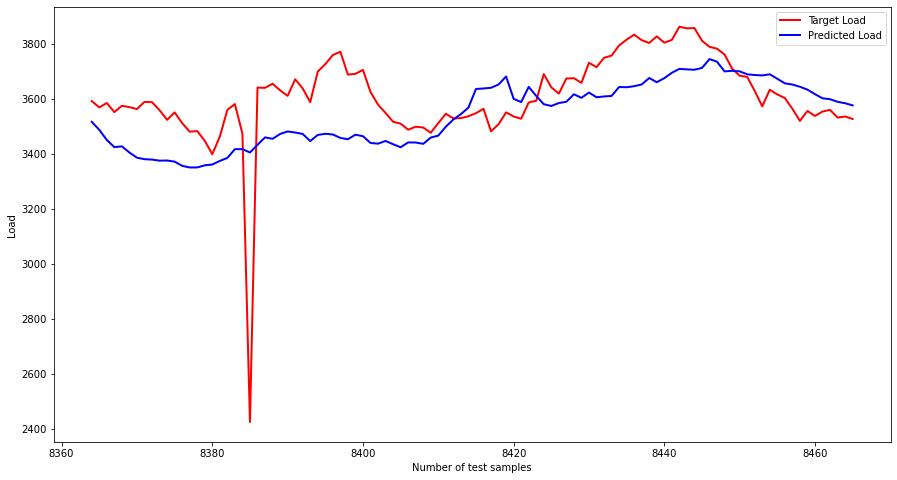

In [49]:
timestamp = y_test.index
plt.figure(figsize = (15,8))
plt.plot(timestamp,rescaled_target_load,label="Target Load",color='red', linestyle='solid',linewidth=2)

plt.plot(timestamp,rescaled_predicted_load,label="Predicted Load",color='blue', linestyle='solid',linewidth=2)

plt.xlabel('Number of test samples') 
plt.ylabel('Load') 
plt.legend()
plt.show()

In [50]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true),np.array(y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE=mean_absolute_percentage_error(rescaled_target_load, rescaled_predicted_load)
print(MAPE)

3.5090130997941316


In [51]:
MPE=np.mean((rescaled_target_load - rescaled_predicted_load) / rescaled_target_load) * 100
print(MPE)

y_t+100    1.714171
dtype: float64


In [52]:
PE=((rescaled_target_load - rescaled_predicted_load / rescaled_target_load)) * 100
APE=np.abs(PE)
print(APE)

            y_t+100
8364  359202.670694
8365  356897.415993
8366  358502.666442
8367  355194.696782
8368  357500.678854
...             ...
8461  355390.223897
8462  355991.909829
8463  353184.744896
8464  353585.956224
8465  352683.785665

[102 rows x 1 columns]


In [53]:
error = np.subtract(rescaled_target_load,rescaled_predicted_load)
sqerr=np.square(error)
print(sqerr)
MSE=sqerr.mean()
print(MSE)

           y_t+100
8364   5675.889960
8365   6659.473590
8366  18077.291164
8367  16272.173898
8368  21797.227653
...            ...
8461   2323.326886
8462   1506.765016
8463   3307.125326
8464   2324.680482
8465   2451.885325

[102 rows x 1 columns]
y_t+100    26776.937605
dtype: float64


In [54]:
RMSE=MSE**0.5
print(RMSE)

y_t+100    163.636602
dtype: float64


In [55]:
a=np.array(rescaled_predicted_load)

In [56]:
for i in  range(0,102):
    b=a[i]
    print(b)

[3517.6672]
[3488.3457]
[3451.5374]
[3425.3486]
[3428.3267]
[3405.8594]
[3386.9668]
[3381.5933]
[3380.1318]
[3376.2498]
[3376.7314]
[3372.733]
[3357.3823]
[3351.4756]
[3351.486]
[3359.2246]
[3362.1553]
[3375.2085]
[3386.1797]
[3417.9932]
[3418.119]
[3405.9062]
[3433.9045]
[3460.8704]
[3455.5989]
[3473.3972]
[3482.4033]
[3478.6067]
[3473.4895]
[3447.417]
[3469.8062]
[3473.9263]
[3471.4258]
[3458.8882]
[3454.155]
[3470.7424]
[3465.181]
[3440.6787]
[3438.0334]
[3447.8535]
[3435.997]
[3424.9941]
[3442.5063]
[3442.274]
[3437.4436]
[3460.2632]
[3467.3447]
[3499.6826]
[3525.9377]
[3545.477]
[3569.167]
[3636.9614]
[3638.8599]
[3641.3936]
[3653.3723]
[3682.4338]
[3601.2825]
[3589.352]
[3644.5764]
[3611.7207]
[3581.631]
[3575.1438]
[3585.9573]
[3590.515]
[3617.8374]
[3604.883]
[3624.0564]
[3606.8232]
[3609.8293]
[3611.6455]
[3644.1877]
[3643.3677]
[3647.0808]
[3653.5527]
[3676.9802]
[3661.5935]
[3676.3818]
[3695.8887]
[3710.1243]
[3708.314]
[3706.9587]
[3713.5688]
[3745.7913]
[3736.1394]
[3700.9